In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
import random
import numpy as np
from myNeuralNetwork import Multi_layer_NeuralNet

In [2]:
# load dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()
#here to reduce time, I won't take all the dataset for train and text, this just aim to make you 
#a small example for training a neural network
train_size= 5000
test_size = 1000
# convert to numpy array
train_X = np.array(train_X)
train_y = np.array(train_y)
test_X = np.array(test_X)
test_y = np.array(test_y)
# shuffle dataset
randomizeTrain = np.arange(len(train_X))
np.random.shuffle(randomizeTrain)
train_X = train_X[randomizeTrain[:train_size]].reshape(train_size,784)
train_y = train_y[randomizeTrain[:train_size]].reshape(train_size,1)

randomizeTest = np.arange(len(test_X))
np.random.shuffle(randomizeTest)
test_X = test_X[randomizeTest[:test_size]].reshape(test_size,784)
test_y = test_y[randomizeTest[:test_size]].reshape(test_size,1)


In [3]:
#printing the shapes of the vectors 
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (5000, 784)
Y_train: (5000, 1)
X_test:  (1000, 784)
Y_test:  (1000, 1)


In [4]:
# preprocessing training data function
def MeanNormalizeX(X):
    max = np.max(X)
    min = np.min(X)
    mean = np.mean(X)
    return (X-mean)/(max-min)

def Normalize(X):
    return X/255

def labellingY(y,k):
    ynew = np.ones((len(y),k))*np.arange(k)
    ynew =((ynew - y)==0)*1
    return ynew

0
[0]


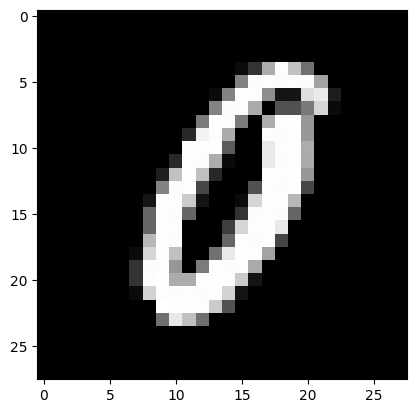

In [5]:
newTrainX = Normalize(train_X)
newTrainy = labellingY(train_y,10)
newTestX = Normalize(test_X)
newTesty = labellingY(test_y,10)
# checking is the label is correct or not
idx = np.random.randint(0,test_size)
print(np.argmax(newTesty[idx]))
print(test_y[idx])
plt.imshow(newTestX[idx].reshape(28,28),cmap='gray')

In [6]:
NN =Multi_layer_NeuralNet(newTrainX,newTrainy,[81,81])
acc,loss=NN.train(200,0.00035)

sample weight 1: (81, 785)
sample weight 2: (81, 82)
sample weight 3: (10, 82)
3
(81, 785)
Epoch 10: AVG ACC during 10 epochs: 20.213333333333335
Epoch 10: Loss: 0.04475437402200241

Epoch 20: AVG ACC during 10 epochs: 29.293333333333333
Epoch 20: Loss: 0.041444363257616086

Epoch 30: AVG ACC during 10 epochs: 49.29333333333333
Epoch 30: Loss: 0.03375780789253768

Epoch 40: AVG ACC during 10 epochs: 63.18
Epoch 40: Loss: 0.026353139469134562

Epoch 50: AVG ACC during 10 epochs: 68.84666666666666
Epoch 50: Loss: 0.023003819096820626

Epoch 60: AVG ACC during 10 epochs: 78.67999999999999
Epoch 60: Loss: 0.0174356250942815

Epoch 70: AVG ACC during 10 epochs: 83.22666666666667
Epoch 70: Loss: 0.014069562875760564

Epoch 80: AVG ACC during 10 epochs: 84.19333333333333
Epoch 80: Loss: 0.013138544732462454

Epoch 90: AVG ACC during 10 epochs: 87.22666666666667
Epoch 90: Loss: 0.011172507124944607

Epoch 100: AVG ACC during 10 epochs: 89.27333333333335
Epoch 100: Loss: 0.009449739340843437

E

In [7]:
NN.Testing(newTestX,newTesty)

Testing...
accuracy after test:  90.5
total loss of Testing:  0.006979797962030744


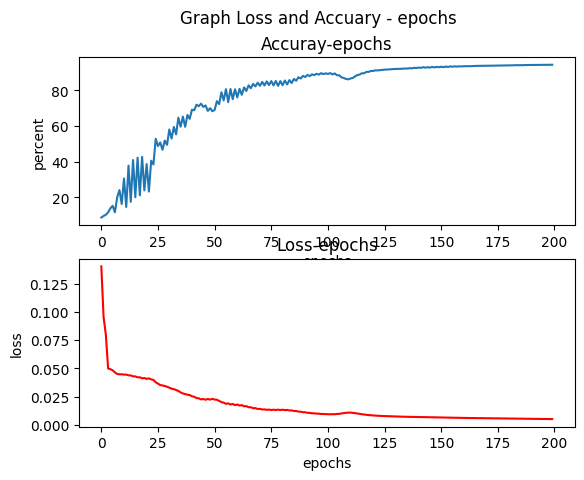

In [8]:
# what an beautiful performance. how about draw something describing the training path of the model
# here is the visualization:

NN.visualize(acc,loss)

Reference
The list of video of Andrew Ng https://www.youtube.com/watch?v=CS4cs9xVecg&list=PLkDaE6sCZn6Ec-XTbcX1uRg2_u4xOEky0 
